In [2]:
import altair as alt
import json
import pandas as pd
from glob import glob


ModuleNotFoundError: No module named 'altair'

In [1]:
linear_path = "outputs/linear_models/00/linear_embeddings.json"
smoosh_path = "outputs/smoosh_models/00/smoosh_embeddings.json"
def load_data(linear, smoosh):
    with open(linear, 'r') as f:
        linear = json.load(f)

    with open(smoosh, 'r') as f:
        smoosh = json.load(f)

    l_embed = linear["embedding"]
    l_class = linear["is_sim"]

    s_embed = smoosh["embedding"]
    s_class = smoosh["is_sim"]
    return l_embed, l_class, s_embed, s_class
l_embed, l_class, s_embed, s_class = load_data(linear_path, smoosh_path)


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/linear_models/00/linear_embeddings.json'

In [4]:
df = pd.DataFrame({"l_emb" : l_embed, "l_class" : l_class, "s_emb": s_embed, "s_class" : s_class})

,l_emb,l_class,s_emb,s_class
0,"[-0.0, -0.0, -0.0, 0.39183008670806885, -0.0, ...",False,"[0.5280631184577942, -0.0, -0.0, -0.0, -0.0, -...",False
1,"[0.4904012680053711, -0.0, -0.0, -0.0, -0.0, -...",False,"[-0.0, -0.0, 0.3009651303291321, 0.77295547723...",False
2,"[-0.0, -0.0, -0.0, 0.09773044288158417, -0.0, ...",False,"[0.20181432366371155, 0.41952481865882874, 0.1...",False
3,"[-0.0, -0.0, -0.0, 0.38349056243896484, -0.0, ...",False,"[0.5971750617027283, -0.0, -0.0, -0.0, -0.0, -...",False
4,"[-0.0, -0.0, -0.0, 0.021509334444999695, -0.0,...",False,"[0.18399310111999512, -0.0, 0.0234310626983642...",False
...,...,...,...,...
3950,"[-0.0, -0.0, -0.0, 0.013286575675010681, -0.0,...",False,"[0.4488608241081238, -0.0, -0.0, -0.0, -0.0, 0...",False
3951,"[0.07667197287082672, -0.0, -0.0, 0.1827787309...",True,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....",True
3952,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.2...",False,"[0.2911548316478729, -0.0, -0.0, 0.04498837888...",False
3953,"[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.1890557...",False,"[0.3507899045944214, -0.0, -0.0, 0.04746080935...",False


In [16]:
from sklearn.decomposition import PCA
x = s_embed
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
principalDf["class"] = ["sim" if i else "real" for i in l_class]

In [17]:
principalDf

,pc1,pc2,class
0,1.719546,-0.576825,real
1,1.297565,1.610959,real
2,1.388149,0.092532,real
3,0.639797,-0.674805,real
4,1.506227,-0.230632,real
...,...,...,...
3950,1.582181,-0.440173,real
3951,-2.388999,0.180479,sim
3952,1.742368,-0.356077,real
3953,0.513169,-0.289543,real


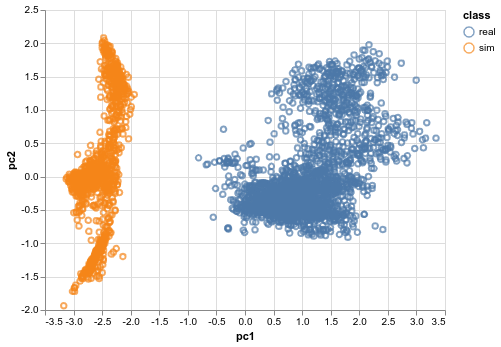

In [18]:

chart = alt.Chart(principalDf)
chart.mark_point().encode(
x='pc1',
y='pc2',
color="class"
)#.properties(background='white').save(save_path, webdriver='firefox', scale_factor=5.0)
        

# event_paths = glob("/home/jp/Documents/silverpond/continious_labelling/phase1/eval_1pc/raw_events/*/*")
# df = extract_pr_curves_from_tensorboard(event_paths, "test.png", "cat")
# df

In [42]:
762/127

6.0

In [52]:
df

,FN,TN,FP,TP,Precision,Recall,Run
0,250.0,38530.0,0.0,0.0,0.006447,1.000,00
1,127.0,38530.0,0.0,123.0,0.003285,0.508,00
2,127.0,38530.0,0.0,123.0,0.003285,0.508,00
3,127.0,38530.0,0.0,123.0,0.003285,0.508,00
4,127.0,38530.0,0.0,123.0,0.003285,0.508,00
...,...,...,...,...,...,...,...
1265,0.0,0.0,38605.0,252.0,0.000000,0.000,09
1266,0.0,0.0,38605.0,252.0,0.000000,0.000,09
1267,0.0,0.0,38605.0,252.0,0.000000,0.000,09
1268,0.0,0.0,38605.0,252.0,0.000000,0.000,09
